**import** các thư viện cần thiết

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as ln
from PIL import Image

%matplotlib inline

Đọc ảnh

In [2]:
url = 'meo.jpeg'
img = Image.open(url)

Image shape: (670, 564, 3)


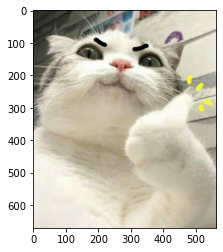

In [3]:
ig = np.array(img)
plt.imshow(ig)
print('Image shape: %s'%str(ig.shape))

In [ ]:
ig

array([[[ 43,  43,  41],
        [ 44,  44,  42],
        [ 44,  44,  42],
        ...,
        [237, 232, 213],
        [237, 232, 213],
        [237, 232, 213]],

       [[ 43,  43,  41],
        [ 43,  43,  41],
        [ 44,  44,  42],
        ...,
        [238, 233, 214],
        [238, 233, 214],
        [238, 233, 214]],

       [[ 43,  44,  39],
        [ 43,  44,  39],
        [ 43,  44,  39],
        ...,
        [239, 234, 215],
        [239, 234, 215],
        [239, 234, 215]],

       ...,

       [[234, 228, 212],
        [234, 228, 212],
        [233, 227, 211],
        ...,
        [149, 141, 120],
        [149, 141, 120],
        [149, 141, 120]],

       [[236, 230, 214],
        [235, 229, 213],
        [235, 229, 213],
        ...,
        [147, 139, 118],
        [146, 138, 117],
        [146, 138, 117]],

       [[237, 231, 215],
        [237, 231, 215],
        [236, 230, 214],
        ...,
        [145, 137, 116],
        [145, 137, 116],
        [144, 136, 115]]

Image shape: (670, 564)


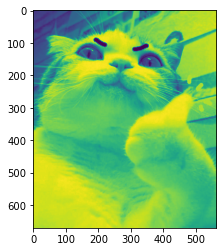

In [4]:
# Convert to grey
ig = ig.dot([0.299, 0.5870, 0.114])
plt.imshow(ig)
print('Image shape: %s'%str(ig.shape))

Ta sẽ thực hiện nén ảnh theo phương pháp SVD sao cho chỉ lấy lần lượt với $10$ và $20$ trị riêng lớn nhất để lưu giữ thông tin.

In [5]:
def SVD_pic(n_evl):
    # lấy độ dài m,n
    m = ig.shape[0]
    n = ig.shape[1]
    
    #Singular Value Decomposition
    U, S, V = ln.svd(ig) 
    
    #Get id position of n highest eigenvalues
    id_trunc = np.argsort(S)[::-1][:n_evl]
    
    #Extract matrix U_t, V_t, S_t
    U_t = U[np.ix_(np.arange(m), id_trunc)]
    V_t = V[np.ix_(id_trunc, np.arange(n))]
    S_diag = S[id_trunc]
    S_t = np.zeros((n_evl, n_evl))
    np.fill_diagonal(S_t, S_diag)
    
    #Return picture
    A = np.dot(U_t, S_t.dot(V_t))
    
    #Norm Frobenius
    fb = ln.norm(A-ig, 'fro')
    prt_retain = (1-fb**2/np.sum(S**2))*100
    plt.imshow(A)
    print('Percentage of information retained: %.2f%s \n'%(prt_retain, '%'))
    
print('hello')

hello


Percentage of information retained: 99.43% 



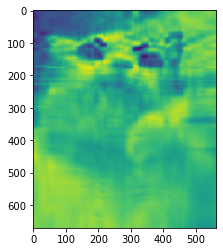

In [6]:
SVD_pic(10)

Percentage of information retained: 99.83% 



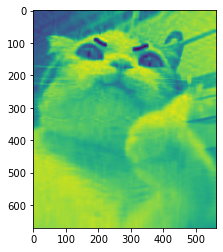

In [9]:
SVD_pic(23)

Như vậy với $10$ trị riêng lớn nhất đã thể hiện được được $99.43%$ thông tin bức ảnh và với $23$ trị riêng lớn nhất thể hiện được $99.83%$ thông tin bức ảnh. So với bức ảnh gốc ta phải lưu trữ ma trận có kích thước là `670x564`. Trong khi với $23$ chiều vector ta chỉ phải lưu trữ các ma trận $Ut,Vt$  có kích thước là `670x23`, `23x564` và ma trận  $S$  có kích thước là `23x23`.<br> Giả định mỗi phần tử của ma trận được lưu với cùng số byte. Như vậy số lượng thông tin ta cần lưu chỉ là:
$$\frac{670*23+23*564+23*23}{670*564} = 7.65\%$$

Do đó phương pháp truncate SVD thường được sử dụng trong nén thông tin rất hiệu quả.